In [1]:
import qiskit

/home/dfx-rick/.local/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)


In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.enable_account('28291aa0926212f535e8dc1b09b25f3dcaba06a0a3fff7df3e2cac54ab58a4a2b2985116a6fd10cfd00b03b818761333a8475a7728926d4dcdcb923b261b3893')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
from qiskit import *

In [6]:
qr= QuantumRegister(2)
cr= ClassicalRegister(2)
circuit= QuantumCircuit(qr, cr)

In [7]:
circuit.draw()

q1_0: 
      
q1_1: 
      
c1: 2/

In [8]:
circuit.h(qr[0])
circuit.draw()

┌───┐
q1_0: ┤ H ├
      └───┘
q1_1: ─────
           
c1: 2/═════

In [9]:
circuit.cx(qr[0], qr[1])
circuit.draw()

┌───┐     
q1_0: ┤ H ├──■──
      └───┘┌─┴─┐
q1_1: ─────┤ X ├
           └───┘
c1: 2/══════════

In [10]:
circuit.measure(qr, cr)

In [11]:
circuit.draw()

┌───┐     ┌─┐   
q1_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q1_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1

In [5]:
%matplotlib inline

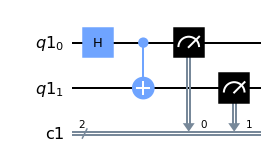

In [13]:
circuit.draw(output= 'mpl')

In [15]:
simulator= Aer.get_backend('qasm_simulator')
result= execute(circuit, backend= simulator).result()

In [6]:
from qiskit.tools.visualization import plot_histogram

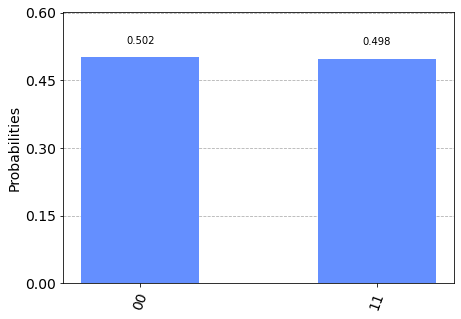

In [17]:
plot_histogram(result.get_counts(circuit))

In [23]:
provider= IBMQ.get_provider('ibm-q')

In [24]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [25]:
job= execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


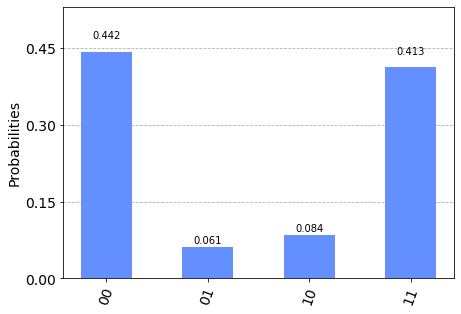

In [27]:
result= job.result()
plot_histogram(result.get_counts(circuit))

In [7]:
from qiskit.tools.visualization import plot_bloch_multivector

[0.+0.j 1.+0.j]


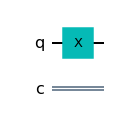

In [10]:
circuit= QuantumCircuit(1,1)
circuit.x(0)
simulator= Aer.get_backend('statevector_simulator')
result= execute(circuit, backend= simulator).result()
statevector= result.get_statevector()
print(statevector)
circuit.draw(output='mpl')

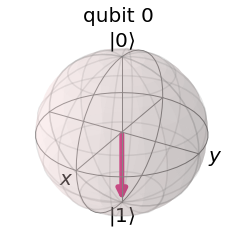

In [11]:
plot_bloch_multivector(statevector)

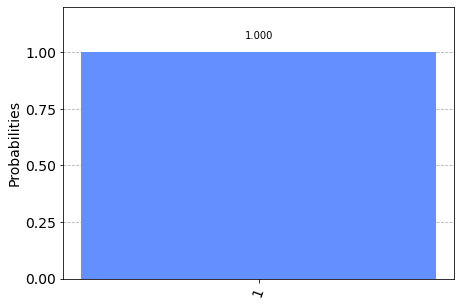

In [13]:
circuit.measure([0], [0])
backend=  Aer.get_backend('qasm_simulator')
result= execute(circuit, backend=backend, shots=1024).result()
counts= result.get_counts()
plot_histogram(counts)

In [14]:
circuit= QuantumCircuit(1,1)
circuit.x(0)
simulator= Aer.get_backend('unitary_simulator')
result= execute(circuit, backend= simulator).result()
unitary= result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


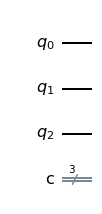

In [15]:
circuit= QuantumCircuit(3, 3)
circuit.draw(output='mpl')

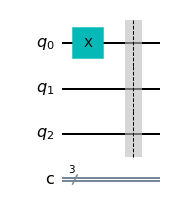

In [17]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

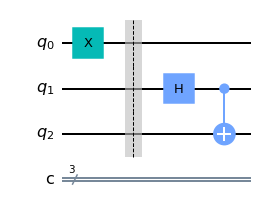

In [18]:
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

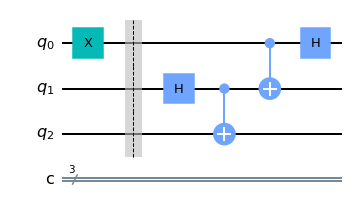

In [19]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

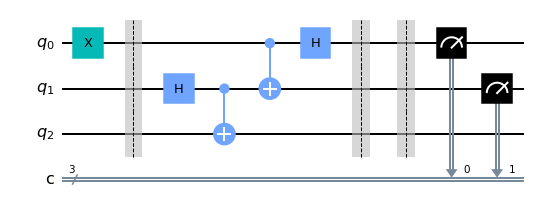

In [21]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

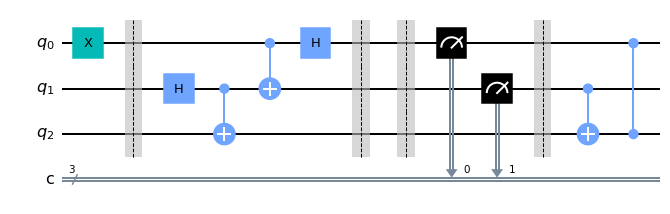

In [22]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

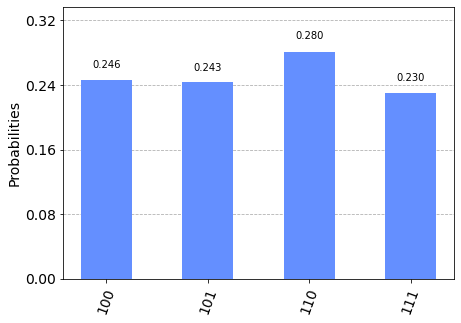

In [26]:
circuit.measure(2,2)
simulator= Aer.get_backend('qasm_simulator')
result= execute(circuit, backend=simulator, shots=1024).result()
counts= result.get_counts()
plot_histogram(counts)

In [27]:
print(counts)

{'100': 252, '101': 249, '111': 236, '110': 287}


Bernstein-Vazirani Algorithm Tutorial 

In [40]:
secretnumber= '10100100'
circuit= QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for i, flag in enumerate(reversed(secretnumber)):
    if flag== '1':
        circuit.cx(i, len(secretnumber))
    
#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

circuit.barrier()

circuit.h(range(len(secretnumber)))
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))



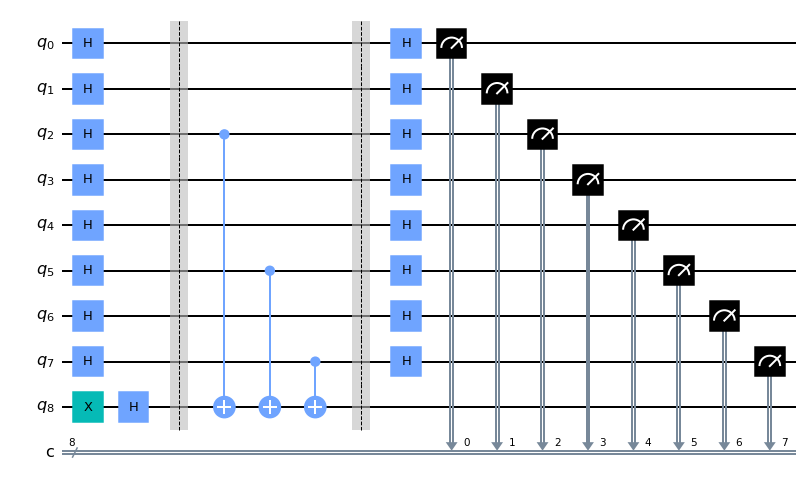

In [41]:
circuit.draw(output="mpl")

In [42]:
simulator= Aer.get_backend('qasm_simulator')
result= execute(circuit, backend= simulator, shots=1).result()
counts= result.get_counts()
print(counts)

{'10100100': 1}


Noise Supression and Error Mitigation Tutorials

In [7]:
n=3
circuit= QuantumCircuit(n, n)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0, 1, 2])

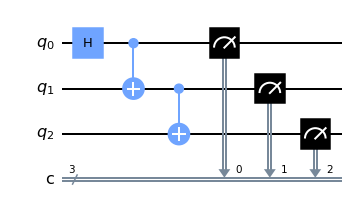

In [8]:
circuit.draw(output='mpl')

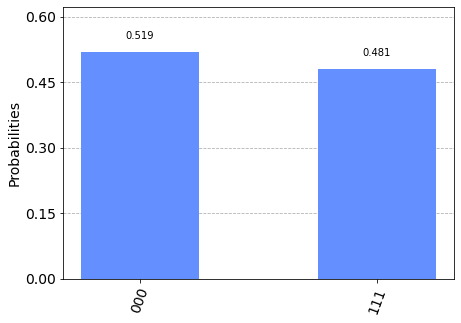

In [9]:
simulator= Aer.get_backend('qasm_simulator')
result= execute(circuit, backend= simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))

In [10]:
provider= IBMQ.get_provider(hub='ibm-q')
device= provider.get_backend('ibmqx2')
job= execute(circuit, backend=device, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

609bee497040481310638323
Job Status: job has successfully run


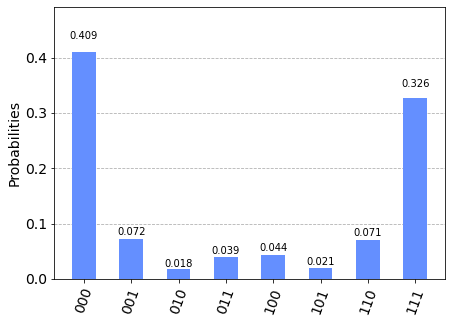

In [12]:
device_result= job.result()
plot_histogram(device_result.get_counts(circuit))

In [14]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels= complete_meas_cal(qr= circuit.qregs[0], circlabel='measerrormitigationcal')

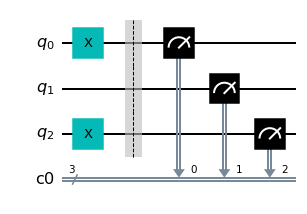

In [16]:
cal_circuits[5].draw(output='mpl')

In [17]:
cal_job= execute(cal_circuits, 
                backend=device,
                shots=1024,
                optimization_level=0
                )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results= cal_job.result()

609bf026772078dd8b90c5e4
Job Status: job has successfully run


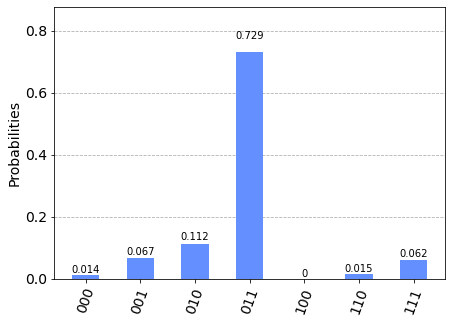

In [18]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

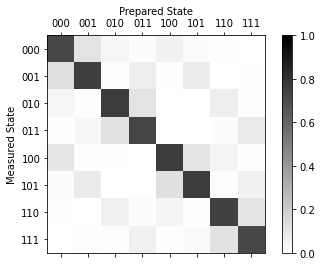

In [20]:
meas_fitter= CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

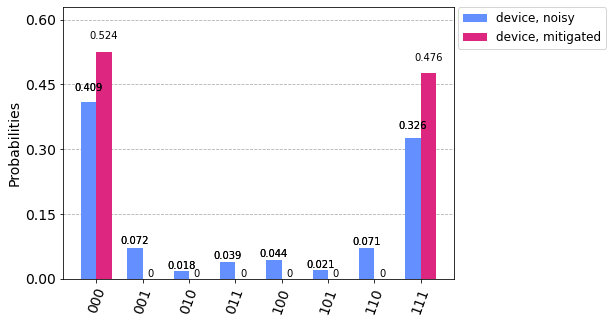

In [23]:
meas_filter= meas_fitter.filter
mitigated_result= meas_filter.apply(result)
device_counts= device_result.get_counts(circuit)
mitigated_counts= mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])